<a href="https://colab.research.google.com/github/PyDataExplorer07/Excel-Project/blob/main/Stat_Prob_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Data Handling:
# How would you handle missing values in a dataset? Describe at least two methods.

In [13]:
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('Sales Data.csv')

In [ ]:
# Check for missing values

print("mising values in each colum")
print(df.isnull().sum())

mising values in each colum
Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64


In [15]:
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [16]:
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [17]:
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode().iloc[0])

In [18]:
df_cleaned_rows = df.dropna()

In [19]:
threshold = 0.5
df_cleaned_cols = df.dropna(axis=1, thresh=int(threshold * len(df)))

In [20]:
print("Dataset after imputing missing values:\n", df.head())
print("\nDataset after deleting rows with missing values:\n", df_cleaned_rows.head())
print("\nDataset after deleting columns with >50% missing values:\n", df_cleaned_cols.head())

Dataset after imputing missing values:
    Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

         Order Date                        Purchase Address  Month    Sales  \
0   12/30/2019 0:01  136 Church St, New York City, NY 10001     12  1700.00   
1   12/29/2019 7:03     562 2nd St, New York City, NY 10001     12   600.00   
2  12/12/2019 18:21    277 Main St, New York City, NY 10001     12    11.95   
3  12/22/2019 15:13     410 6th St, San Francisco, CA 94016     12   149.99   
4  12/18/2019 12:38           43 Hill St, Atlanta, GA 30301     12    11.95   

          

In [21]:
# Explain why it might be necessary to convert data types before performing an analysis.

In [22]:
# 1. Check the initial data types
print("Initial Data Types:")
print(df.dtypes)

# 2. Convert a column to numeric (e.g., Sales) if it's read as a string
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')  # Coerce converts non-numeric to NaN
print("\nData Types after converting Sales to numeric:")
print(df['Sales'].dtype)

# 3. Convert a column to datetime (e.g., Order Date) if it's in string format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')  # Coerce handles invalid date formats
print("\nData Types after converting Order Date to datetime:")
print(df['Order Date'].dtype)

# 4. Summary of all data types after conversions
print("\nSummary of Data Types After Conversions:")
print(df.dtypes)

Initial Data Types:
Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

Data Types after converting Sales to numeric:
float64

Data Types after converting Order Date to datetime:
datetime64[ns]

Summary of Data Types After Conversions:
Unnamed: 0                   int64
Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Sales                      float64
City                        object
Hour                         int64
dtype: object


In [23]:
# 2. Statistical Analysis:
# What is a T-test, and in what scenarios would you use it? Provide an example based on sales data.


In [24]:
data = {
    'Region': ['A', 'A', 'A', 'B', 'B', 'B'],
    'Sales': [200, 220, 210, 180, 190, 195]
}
df = pd.DataFrame(data)

In [25]:
# Filter sales by region
region_a_sales = df[df['Region'] == 'A']['Sales']
region_b_sales = df[df['Region'] == 'B']['Sales']

In [26]:
# Perform an independent T-test
t_stat, p_value = ttest_ind(region_a_sales, region_b_sales, equal_var=False)

In [27]:
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: 2.9824045403173014
P-Value: 0.044236134487085806


In [50]:
if p_value < 0.05:
    print("The difference in average sales between Region A and Region B is significant.")
else:
    print("There is no significant difference in average sales between Region A and Region B.")

The difference in average sales between Region A and Region B is significant.


In [51]:
# Describe the Chi-square test for independence and explain when it should be used. How would you apply it to test the relationship between shipping mode and customer segment?


In [52]:
data = {
    'Shipping Mode': ['Standard', 'Express', 'Standard', 'Same Day', 'Standard', 'Express', 'Same Day'],
    'Customer Segment': ['Consumer', 'Corporate', 'Home Office', 'Consumer', 'Corporate', 'Home Office', 'Consumer']
}

In [53]:
df = pd.DataFrame(data)

In [54]:
# Create a contingency table
contingency_table = pd.crosstab(df['Shipping Mode'], df['Customer Segment'])

In [55]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [56]:
print("Chi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 4.277777777777778
P-Value: 0.3697160469574798
Degrees of Freedom: 4
Expected Frequencies:
[[0.85714286 0.57142857 0.57142857]
 [0.85714286 0.57142857 0.57142857]
 [1.28571429 0.85714286 0.85714286]]


In [57]:
if p < 0.05:
    print("There is a significant relationship between Shipping Mode and Customer Segment.")
else:
    print("There is no significant relationship between Shipping Mode and Customer Segment.")

There is no significant relationship between Shipping Mode and Customer Segment.


In [58]:
# 3. Univariate and Bivariate Analysis:
# What is univariate analysis, and what are its key purposes?

In [83]:
print("Summary Statistics for Sales:")
print(df['Sales'].describe())

Summary Statistics for Sales:
count    185950.000000
mean        185.490917
std         332.919771
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        3400.000000
Name: Sales, dtype: float64


In [84]:
print("\nMissing Values in Sales Column:", df['Sales'].isnull().sum())


Missing Values in Sales Column: 0


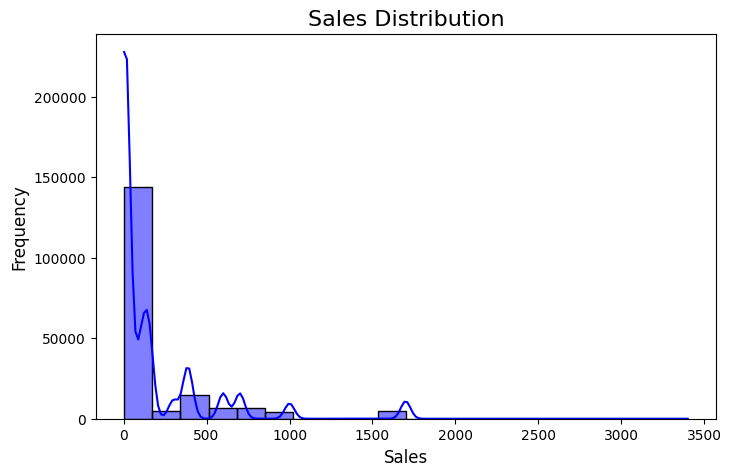

In [85]:
# Histogram: Distribution of Sales
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], kde=True, bins=20, color='blue')
plt.title("Sales Distribution", fontsize=16)
plt.xlabel("Sales", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

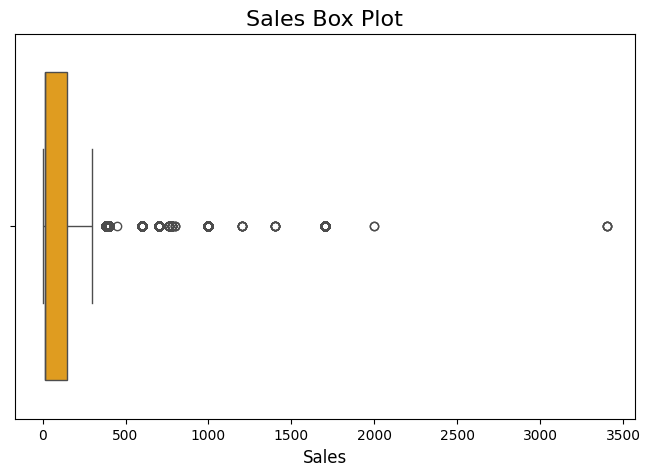

In [86]:
# Box Plot: Identify Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Sales'], color='orange')
plt.title("Sales Box Plot", fontsize=16)
plt.xlabel("Sales", fontsize=12)
plt.show()

In [63]:
# Que.2 Explain the difference between univariate and bivariate analysis. Provide an example of each.

In [64]:
# 1. Univariate Analysis Example
# Analyzing the Sales column in a sales dataset to understand its distribution.

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
data = {'Sales': [100, 200, 300, 400, 500, 600, 700, 800]}
df = pd.DataFrame(data)

In [67]:
print(df['Sales'].describe())

count      8.000000
mean     450.000000
std      244.948974
min      100.000000
25%      275.000000
50%      450.000000
75%      625.000000
max      800.000000
Name: Sales, dtype: float64


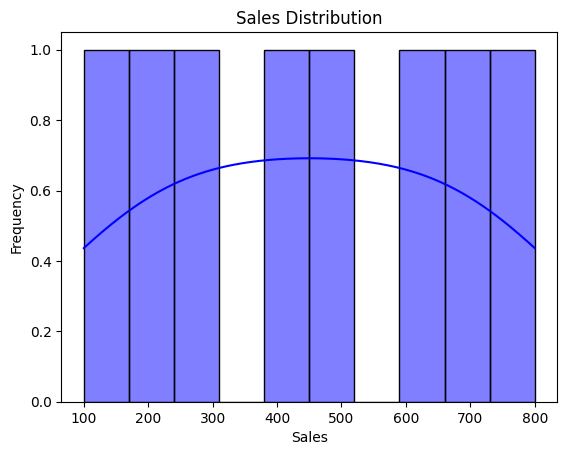

In [68]:
# Histogram
sns.histplot(df['Sales'], kde=True, bins=10, color='blue')
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

In [69]:
# 2. Bivariate Analysis Example
# Analyzing the relationship between Sales and Advertising Spend to determine if more advertising results in higher sales.

In [70]:
data = {'Sales': [100, 200, 300, 400, 500, 600, 700, 800],
        'Advertising Spend': [10, 20, 30, 40, 50, 60, 70, 80]}
df = pd.DataFrame(data)

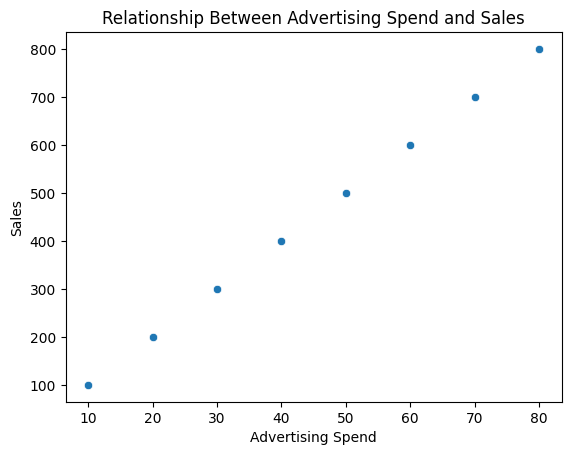

Correlation between Sales and Advertising Spend: 1.0


In [71]:
# Scatter plot
sns.scatterplot(x='Advertising Spend', y='Sales', data=df)
plt.title("Relationship Between Advertising Spend and Sales")
plt.xlabel("Advertising Spend")
plt.ylabel("Sales")
plt.show()

# Correlation
correlation = df['Sales'].corr(df['Advertising Spend'])
print("Correlation between Sales and Advertising Spend:", correlation)

In [72]:
# 4.Data Visualization:
# Que.1 What are the benefits of using a correlation matrix in data analysis? How would you interpret the results?

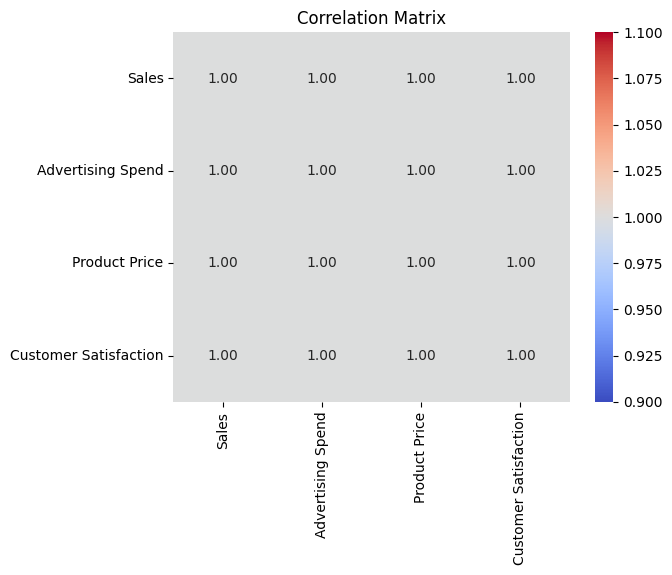

                       Sales  Advertising Spend  Product Price  \
Sales                    1.0                1.0            1.0   
Advertising Spend        1.0                1.0            1.0   
Product Price            1.0                1.0            1.0   
Customer Satisfaction    1.0                1.0            1.0   

                       Customer Satisfaction  
Sales                                    1.0  
Advertising Spend                        1.0  
Product Price                            1.0  
Customer Satisfaction                    1.0  


In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset
data = {
    'Sales': [100, 200, 300, 400, 500],
    'Advertising Spend': [10, 20, 30, 40, 50],
    'Product Price': [5, 10, 15, 20, 25],
    'Customer Satisfaction': [80, 85, 90, 95, 100]
}

df = pd.DataFrame(data)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Print correlation matrix
print(corr_matrix)

In [74]:
#Que.2) How would you plot sales trends over time using a dataset? Describe the steps and tools you would use.

In [75]:
# 1. Load and Prepare the Data
import pandas as pd

# Load the dataset
df = pd.read_csv('Sales Data.csv')

# Ensure the date column is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Check the data structure
print(df.head())


   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

           Order Date                        Purchase Address  Month    Sales  \
0 2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12  1700.00   
1 2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   600.00   
2 2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12    11.95   
3 2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   149.99   
4 2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12    11.95   

             City  Hour  
0   New York

In [76]:
# 2. Clean the Data
# Remove rows where either 'Order Date' or 'Sales' is missing
df = df.dropna(subset=['Order Date', 'Sales'])

# Optionally filter out any rows with future dates
df = df[df['Order Date'] <= pd.to_datetime('today')]

In [77]:
# 3. Aggregate Sales by Time Period
# Group by month and calculate total sales for each month
df['Month'] = df['Order Date'].dt.to_period('M')  # Group by month
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

# Check the aggregated data
print(monthly_sales.head())

     Month       Sales
0  2019-01  1813586.44
1  2019-02  2202022.42
2  2019-03  2807100.38
3  2019-04  3390670.24
4  2019-05  3152606.75


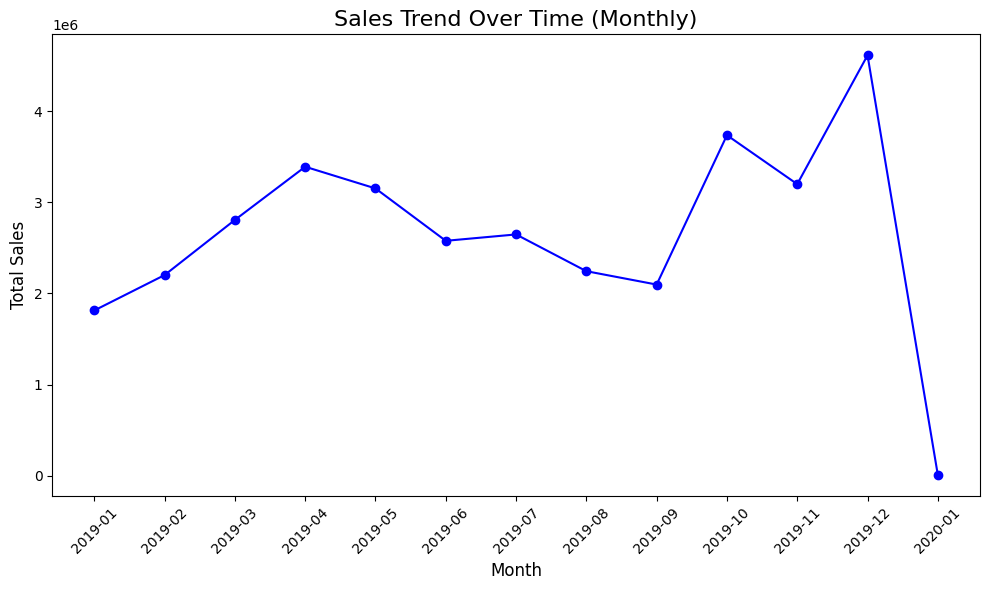

In [78]:
# 4. Plot the Sales Trend

import matplotlib.pyplot as plt

# Plotting the sales trend over time (monthly)
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Sales'], marker='o', color='b')

# Add title and labels
plt.title('Sales Trend Over Time (Monthly)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

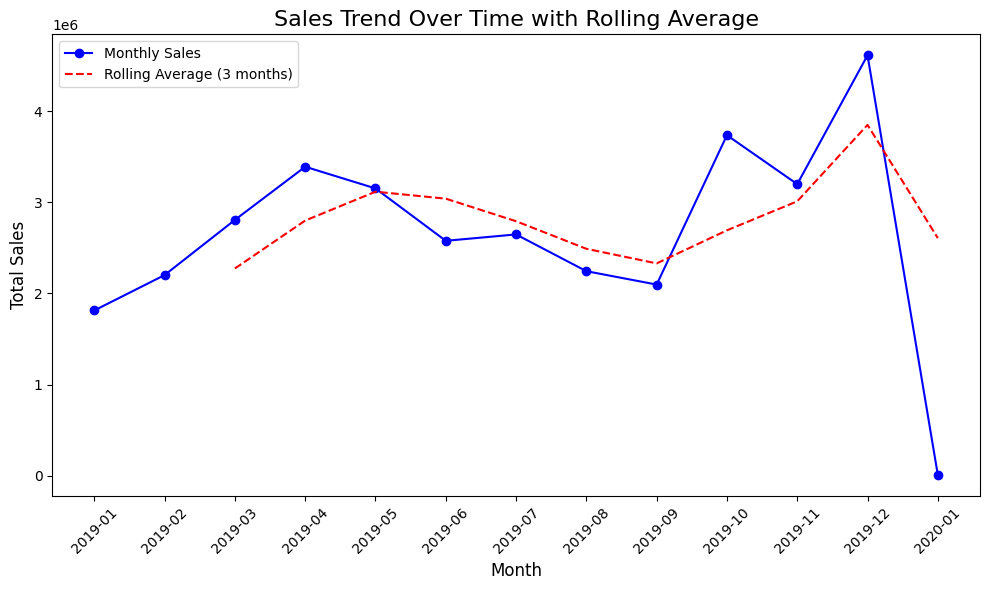

In [79]:
# 5. Customize and Enhance the Plot

# Calculate a 3-month rolling average for a smoother trend line
monthly_sales['Rolling Average'] = monthly_sales['Sales'].rolling(window=3).mean()

# Plot both original and smoothed trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Sales'], marker='o', label='Monthly Sales', color='b')
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Rolling Average'], label='Rolling Average (3 months)', color='r', linestyle='--')

# Add title and labels
plt.title('Sales Trend Over Time with Rolling Average', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [87]:
# 5. Sales and Profit Analysis:
# Que.1 How can you identify top-performing product categories based on total sales and profit? Describe the process.

In [95]:
import pandas as pd

# Load the dataset (update the file path as needed)
file_path = 'Sales Data.csv'  # Replace with the path to your file
sales_data = pd.read_csv(file_path)

# Define the category mapping based on product keywords
category_mapping = {
    'Macbook': 'Electronics',
    'Laptop': 'Electronics',
    'Monitor': 'Computer Accessories',
    'Cable': 'Accessories',
    'Washing': 'Home Appliances',
    'Machine': 'Home Appliances',
    'Phone': 'Electronics',
    'Chair': 'Furniture',
    'Table': 'Furniture'
}

# Add a Category column based on the Product name
sales_data['Category'] = sales_data['Product'].apply(
    lambda x: next((category for keyword, category in category_mapping.items() if keyword in x), 'Other')
)

# Group by Category and aggregate Sales and Quantity Ordered
aggregated_data = sales_data.groupby('Category').agg({
    'Sales': 'sum',
    'Quantity Ordered': 'sum'
}).reset_index()

# Calculate Profit assuming a 20% profit margin
aggregated_data['Profit'] = aggregated_data['Sales'] * 0.2

# Save the results to a new file
output_path = 'Aggregated_Sales_Data.csv'
aggregated_data.to_csv(output_path, index=False)

# Display the results
print("Aggregated Data:")
print(aggregated_data)
print(f"Results saved to {output_path}")


Aggregated Data:
               Category        Sales  Quantity Ordered       Profit
0           Accessories    633595.40             47192   126719.080
1  Computer Accessories   6377228.78             24122  1275445.756
2           Electronics  21108258.70             23307  4221651.740
3       Home Appliances    399600.00               666    79920.000
4                 Other   5973353.09            113792  1194670.618
Results saved to Aggregated_Sales_Data.csv


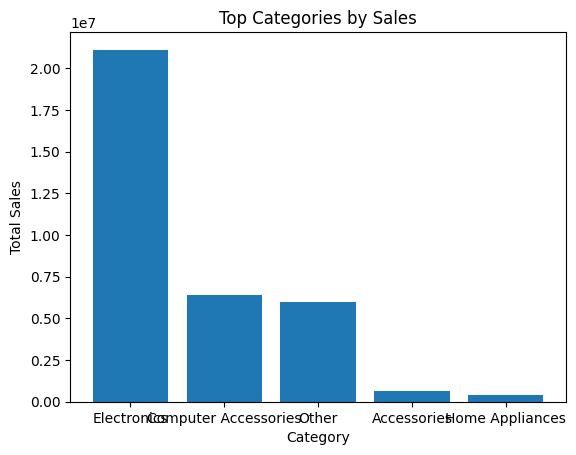

In [96]:
import matplotlib.pyplot as plt
aggregated_data.sort_values(by='Sales', ascending=False, inplace=True)
plt.bar(aggregated_data['Category'], aggregated_data['Sales'])
plt.title('Top Categories by Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


In [97]:
# Que 2. Explain how you would analyze seasonal sales trends using historical sales data.

In [99]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

In [100]:
sales_data['Month'] = sales_data['Order Date'].dt.month
sales_data['Year'] = sales_data['Order Date'].dt.year

In [102]:
monthly_sales = sales_data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

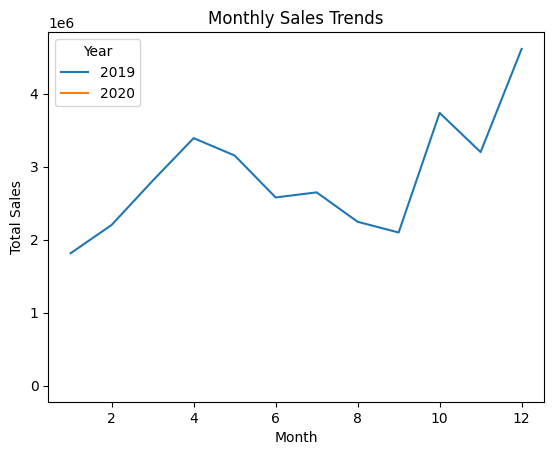

In [104]:
import matplotlib.pyplot as plt

monthly_sales.pivot(index='Month', columns='Year', values='Sales').plot(kind='line')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

<Axes: xlabel='Year', ylabel='Month'>

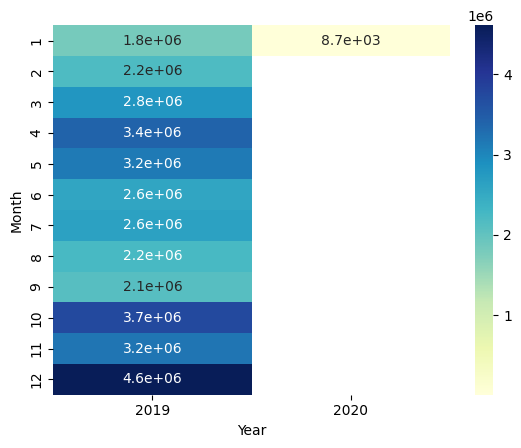

In [105]:
import seaborn as sns

heatmap_data = monthly_sales.pivot(index='Month', columns='Year', values='Sales')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True)


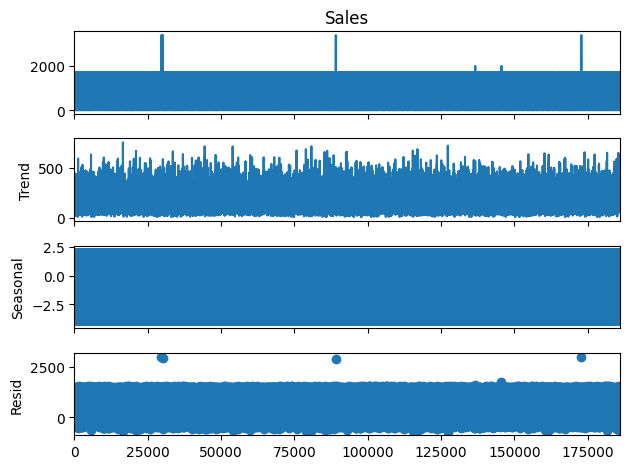

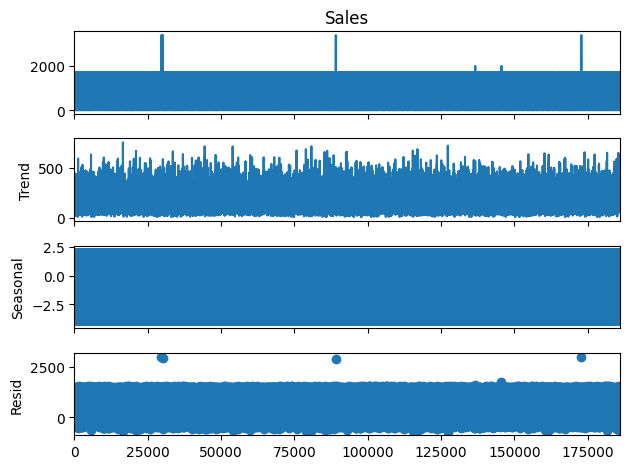

In [106]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales_data['Sales'], model='additive', period=12)
decomposition.plot()

In [109]:
# 6. Grouped Statistics:
# Que.  Why is it important to calculate grouped statistics for key variables? Provide an example using regional sales data.

In [122]:
'''Ans.Importance of Grouped Statistics for Key Variables

Grouped statistics help break down large datasets into smaller, more meaningful summaries for specific groups, such as regions, categories, or time periods. This approach makes it easier to spot trends, compare performance, and make better decisions.

Why It's Important:
1. Understand Differences: You can see which group (e.g., region or product) is performing well or poorly.
2. Focus on Priorities: Focus efforts on underperforming areas or maximize growth in top-performing ones.
3. Simplify Analysis: Instead of looking at raw data, grouped statistics give you clear summaries for quick insights.


Importance of Grouped Statistics for Key Variables
Grouped statistics help break down large datasets into smaller, more meaningful summaries for specific groups, such as regions, categories, or time periods. This approach makes it easier to spot trends, compare performance, and make better decisions.

Why It's Important:
Understand Differences: You can see which group (e.g., region or product) is performing well or poorly.
Focus on Priorities: Focus efforts on underperforming areas or maximize growth in top-performing ones.
Simplify Analysis: Instead of looking at raw data, grouped statistics give you clear summaries for quick insights.

Example Using Regional Sales Data:
Imagine you have sales data for different regions: North, South, East, and West. You calculate total sales, total profit, and profit margin for each region.


Results Example:

Region	Total Sales	Total Profit	Profit Margin (%)
North	$50,000		$10,000		20%
South	$70,000		$14,000		20%
East	$60,000		$12,000		20%
West	$40,000		$8,000		20%


Insights You Can Gain:
1. Top Region: The South region has the highest sales.
2. Improvement Needed: The West region has the lowest sales and may need attention.
3. Consistent Profitability: All regions maintain a 20% profit margin.'''


"Ans.Importance of Grouped Statistics for Key Variables\n\nGrouped statistics help break down large datasets into smaller, more meaningful summaries for specific groups, such as regions, categories, or time periods. This approach makes it easier to spot trends, compare performance, and make better decisions.\n\nWhy It's Important:\n1. Understand Differences: You can see which group (e.g., region or product) is performing well or poorly.\n2. Focus on Priorities: Focus efforts on underperforming areas or maximize growth in top-performing ones.\n3. Simplify Analysis: Instead of looking at raw data, grouped statistics give you clear summaries for quick insights.\n\n\nImportance of Grouped Statistics for Key Variables\nGrouped statistics help break down large datasets into smaller, more meaningful summaries for specific groups, such as regions, categories, or time periods. This approach makes it easier to spot trends, compare performance, and make better decisions.\n\nWhy It's Important:\nU